In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

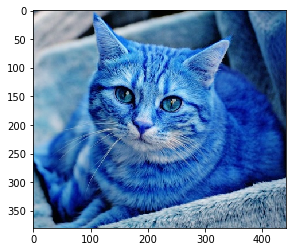

In [5]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
# cv2.imshow(title, image)
plt.imshow(image) 
# 고양이가 파란이유는 주피터 노트에는 RGB가 아닌 BGR로 이용하기 때문 R->B, B->R

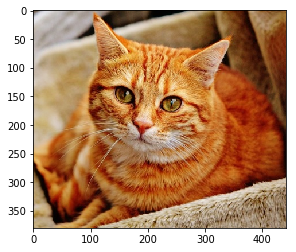

In [6]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB
plt.imshow(cat)

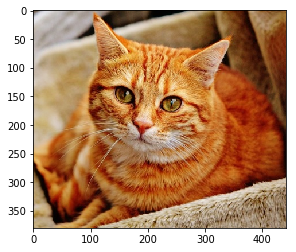

In [7]:
b, g, r = cv2.split(image) # img 파일을 b,g,r로 분리
image = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.imshow(image)

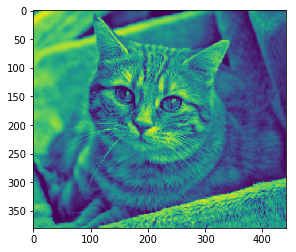

In [9]:
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage)
# cmap = plt.get_cmap('gray') 없으면 야광? 같은 색이 나옴

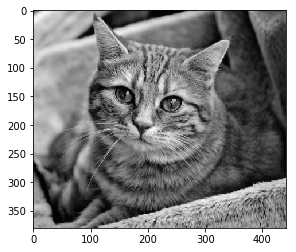

In [8]:
# Gray Scale image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap = plt.get_cmap('gray'))

## OpenCV 이미지 연산

In [10]:
image = cv2.imread('images/image_2.png')
print(image.shape)
print(image.size)

(720, 1280, 3)
2764800


In [11]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0,100): # 이미지는 array라고 생각하면 됨. 첫 시작이 (0,0)
    for k in range(0, 100):
        image[i, k] = [255,255,255] # 하얀색으로 바뀜
print("-- %s seconds --" % (time.time()-start_time))

-- 0.01500082015991211 seconds --


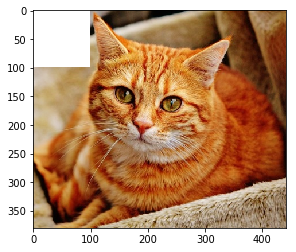

In [12]:
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage) # 위에 (0,0)부터 (100,100)까지 흰색으로 바뀜

In [13]:
start_time = time.time()
basicImage[0:100, 0:100] = [0,0,0] # 슬라이싱을 이용
print("-- %s second --" % (time.time()- start_time))

-- 0.0 second --


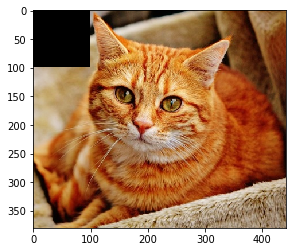

In [14]:
plt.imshow(basicImage) # (0,0)부터 (100,100)까지 검은색으로 바뀜

## 이미지 크기 조절

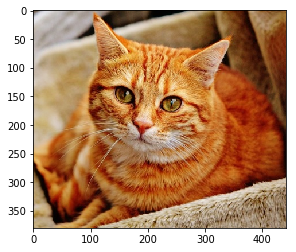

In [15]:
image = cv2.imread('images/cat.jpg')
expand = cv2.resize(image, None, fx=2.0, fy = 2.0, interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

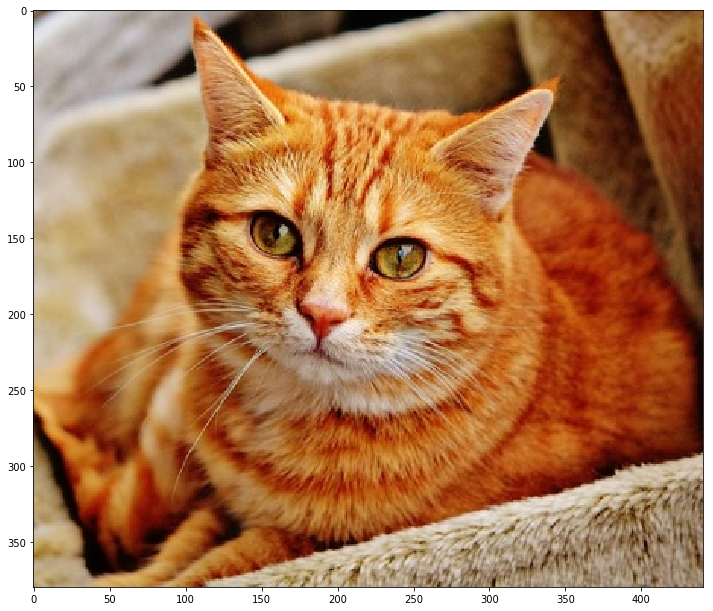

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(image)

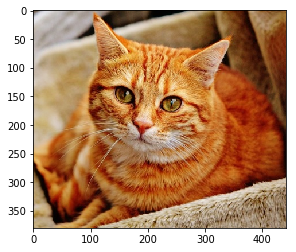

In [18]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(image)

### 이미지 위치 변경
#### cv2.warpAffine(image, M, dsize)
* M: 변환 행렬
* dsize: Manual Size
* 변환 행렬
    * 𝑀11 𝑀12 𝑀13
    * 𝑀21 𝑀22 𝑀23
* 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동
    * (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)
* 단순 이미지 위치 변경
    * 1 0 x위치
    * 0 1 y위치

In [26]:
image = cv2.imread('images/cat.jpg')

In [27]:
image.shape

(380, 441, 3)

In [28]:
height, width = image.shape[:2]

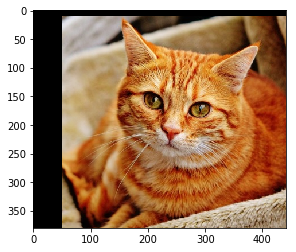

In [31]:
M = np.float32([[1,0,50], [0,1,10]])
dst = cv2.warpAffine(image, M, (width, height))
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

### 이미지 회전
#### cv2.getRotationMatrix2D(center, angle, scale)
* center: 회전 중심
* angle: 회전 각도
* scale: Scale Factor

* 회전 변환을 위한 기본적인 행렬
    * 𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
    * 𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃

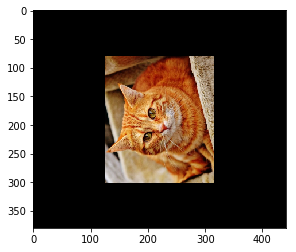

In [32]:
image = cv2.imread('images/cat.jpg')
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

## OpenCV 이미지 합치기

In [33]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

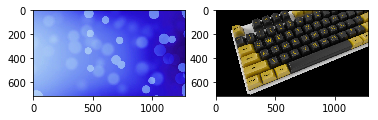

In [37]:
plt.subplot(121)
plt.imshow(image_1)

plt.subplot(122)
plt.imshow(image_2)

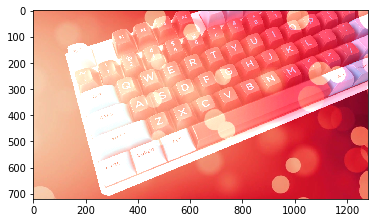

In [34]:
result = cv2.add(image_1, image_2)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

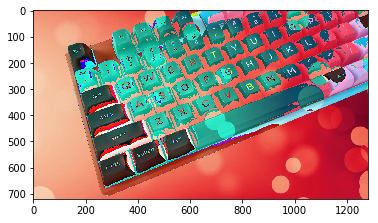

In [38]:
result = image_1 + image_2
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

## 임계점 처리하기

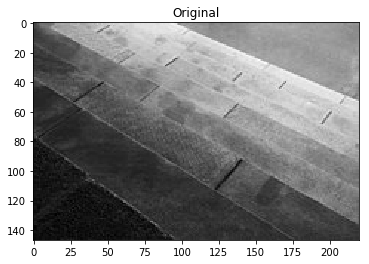

In [39]:
basic = cv2.imread('images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

In [40]:
grey1 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY)
grey2 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY_INV)
grey3 = cv2.threshold(basic, 127, 255, cv2.THRESH_TRUNC)
grey4 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO)
grey5 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO_INV)

In [46]:
grey1

(127.0, array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

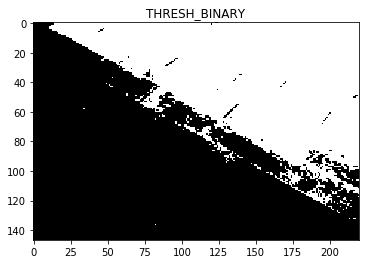

In [41]:
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

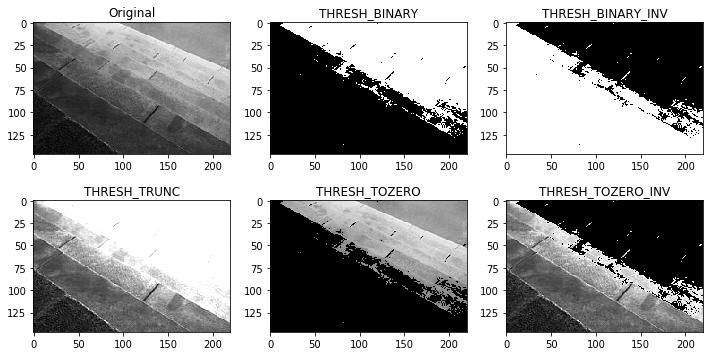

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

plt.subplot(232)
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

plt.subplot(233)
plt.title('THRESH_BINARY_INV')
plt.imshow(grey2[1], cmap=plt.get_cmap('gray'))

plt.subplot(234)
plt.title('THRESH_TRUNC')
plt.imshow(grey3[1], cmap=plt.get_cmap('gray'))

plt.subplot(235)
plt.title('THRESH_TOZERO')
plt.imshow(grey4[1], cmap=plt.get_cmap('gray'))

plt.subplot(236)
plt.title('THRESH_TOZERO_INV')
plt.imshow(grey5[1], cmap=plt.get_cmap('gray'))

In [44]:
image = cv2.imread('images/hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)
thres1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

In [47]:
thres1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

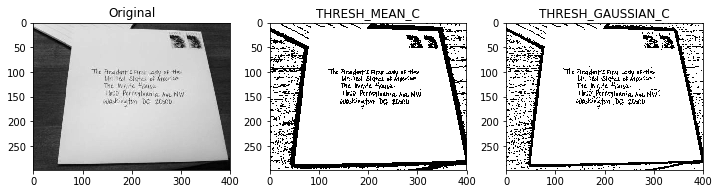

In [45]:
# 하나의 이미지에 다수의 조명 상태가 존재하는 경우
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image, cmap=plt.get_cmap('gray'))

plt.subplot(132)
plt.title('THRESH_MEAN_C')
plt.imshow(thres1, cmap=plt.get_cmap('gray'))

plt.subplot(133)
plt.title('THRESH_GAUSSIAN_C')
plt.imshow(thres2, cmap=plt.get_cmap('gray'))